In [36]:
# Imported Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Fetching sampled data derived from Base.csv due to github file size limit.
path = "./Resources/sample_base.csv"

# Creating base fraud dataframe.
fraud_df = pd.read_csv(path,header='infer',index_col=None)
fraud_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,AB,2570,...,0,1500.0,0,INTERNET,37.831889,windows,0,1,0,2
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,AB,1081,...,1,200.0,0,INTERNET,1.610226,linux,1,1,0,6
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,AB,2162,...,0,500.0,0,INTERNET,5.502750,linux,0,1,0,3
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,AB,2676,...,1,1500.0,0,INTERNET,3.209488,windows,1,1,0,4
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,AB,621,...,1,500.0,0,INTERNET,8.416212,other,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.1,0.315213,-1,381,20,0.029162,-0.961046,AC,1774,...,0,200.0,0,INTERNET,8.994981,other,1,1,0,4
199996,0,0.7,0.546810,-1,79,40,0.010970,-1.193305,AC,1449,...,1,1500.0,0,INTERNET,2.285306,windows,1,0,0,0
199997,0,0.1,0.999241,28,13,20,0.013964,-1.608212,AD,1097,...,0,200.0,0,INTERNET,5.855588,other,1,1,0,0
199998,0,0.2,0.022199,-1,55,60,0.014597,-1.380137,AB,1766,...,0,200.0,0,INTERNET,9.292629,windows,0,2,0,1


In [3]:
# Check if any columns have null values and what data types they are.
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        200000 non-null  int64  
 1   income                            200000 non-null  float64
 2   name_email_similarity             200000 non-null  float64
 3   prev_address_months_count         200000 non-null  int64  
 4   current_address_months_count      200000 non-null  int64  
 5   customer_age                      200000 non-null  int64  
 6   days_since_request                200000 non-null  float64
 7   intended_balcon_amount            200000 non-null  float64
 8   payment_type                      200000 non-null  object 
 9   zip_count_4w                      200000 non-null  int64  
 10  velocity_6h                       200000 non-null  float64
 11  velocity_24h                      200000 non-null  f

In [4]:
# List the columns names for analysis.
fraud_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
# Print the value counts for fraud_bool to check the non_fraudulant versus fraudualant data distribution.
fraud_df['fraud_bool'].value_counts()

fraud_bool
0    197768
1      2232
Name: count, dtype: int64

In [6]:
# Separate object data into another dataframe for one-hot encoding.
object_df = fraud_df.select_dtypes(include=['object','string'])
object_df

,payment_type,employment_status,housing_status,source,device_os
0,AB,CA,BE,INTERNET,windows
1,AB,CA,BC,INTERNET,linux
2,AB,CA,BC,INTERNET,linux
3,AB,CB,BA,INTERNET,windows
4,AB,CA,BA,INTERNET,other
...,...,...,...,...,...
199995,AC,CA,BE,INTERNET,other
199996,AC,CA,BA,INTERNET,windows
199997,AD,CA,BE,INTERNET,other
199998,AB,CC,BD,INTERNET,windows


In [7]:
# Create one hot encoder object for payment_type column.
encode_payments = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Fit the payment_type values to be converted into separate binary columns (1,0).
encode_payments.fit(object_df['payment_type'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [8]:
# Create one hot encoder object for employment_status column.
encode_employment = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Fit the employment_status values to be converted into separate binary columns (1,0).
encode_employment.fit(object_df['employment_status'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [9]:
# Create one hot encoder object for housing_status column.
encode_housing = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Fit the housing_status values to be converted into separate binary columns (1,0).
encode_housing.fit(object_df['housing_status'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [10]:
# Create one hot encoder object for source column.
encode_source = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Fit the source values to be converted into separate binary columns (1,0).
encode_source.fit(object_df['source'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [11]:
# Create one hot encoder object for device_os column.
encode_device = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Fit the device_os values to be converted into separate binary columns (1,0).
encode_device.fit(object_df['device_os'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [12]:
# Separate numerical columns from base data set for later concatonation of encoded data
numerical_df = fraud_df.select_dtypes(exclude=['object','string'])
numerical_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,2570,6079.874351,...,1,11,0,1500.0,0,37.831889,0,1,0,2
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,1081,1727.733739,...,1,1,1,200.0,0,1.610226,1,1,0,6
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,2162,1108.075600,...,0,1,0,500.0,0,5.502750,0,1,0,3
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,2676,3849.725772,...,1,19,1,1500.0,0,3.209488,1,1,0,4
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,621,3282.921660,...,0,26,1,500.0,0,8.416212,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.1,0.315213,-1,381,20,0.029162,-0.961046,1774,10114.552068,...,1,-1,0,200.0,0,8.994981,1,1,0,4
199996,0,0.7,0.546810,-1,79,40,0.010970,-1.193305,1449,10863.678026,...,0,-1,1,1500.0,0,2.285306,1,0,0,0
199997,0,0.1,0.999241,28,13,20,0.013964,-1.608212,1097,7038.375489,...,1,26,0,200.0,0,5.855588,1,1,0,0
199998,0,0.2,0.022199,-1,55,60,0.014597,-1.380137,1766,8041.734623,...,1,5,0,200.0,0,9.292629,0,2,0,1


In [13]:
# Generate individual dataframes for the encoded data with proper columns headers.
encoded_payments_df = pd.DataFrame(encode_payments.transform(object_df['payment_type'].values.reshape(-1, 1)), columns=encode_payments.get_feature_names_out())
encoded_employment_df = pd.DataFrame(encode_employment.transform(object_df['employment_status'].values.reshape(-1, 1)), columns=encode_employment.get_feature_names_out())
encoded_housing_df = pd.DataFrame(encode_housing.transform(object_df['housing_status'].values.reshape(-1, 1)), columns=encode_housing.get_feature_names_out())
encoded_source_df = pd.DataFrame(encode_source.transform(object_df['source'].values.reshape(-1, 1)), columns=encode_source.get_feature_names_out())
encoded_device_df = pd.DataFrame(encode_device.transform(object_df['device_os'].values.reshape(-1, 1)), columns=encode_device.get_feature_names_out())

# List of dataframes to concat
dfs = [numerical_df, encoded_payments_df,encoded_employment_df,encoded_housing_df,encoded_source_df,encoded_device_df]

# Generate new encoded_fraud_df
encoded_fraud_df = pd.concat(dfs,axis=1)

In [14]:
# Display encoded data
encoded_fraud_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,x0_BE,x0_BF,x0_BG,x0_INTERNET,x0_TELEAPP,x0_linux,x0_macintosh,x0_other,x0_windows,x0_x11
0,0,0.1,0.771248,-1,192,20,0.008449,-1.050951,2570,6079.874351,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.9,0.868609,-1,8,30,0.003503,-0.683337,1081,1727.733739,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.6,0.461974,30,8,30,0.006326,-0.916832,2162,1108.075600,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.9,0.388111,31,2,50,0.010480,-0.817218,2676,3849.725772,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.9,0.512189,-1,249,50,0.013239,-0.230889,621,3282.921660,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Separate features to standardize the now numerical data.
X = encoded_fraud_df.drop(columns="fraud_bool")
y =  encoded_fraud_df["fraud_bool"]

In [16]:
# Create Pipeline object for the normalization of numerical features.
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalize numerical features
])

In [17]:
# Create Pipeline object to transform the data using the prior defined numerical_pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, X.columns)
    ])

In [18]:
# Apply preprocessing to the data
X_cleaned = preprocessor.fit_transform(X)

In [19]:
# Generate a dataframe of the cleaned version of the data.
df_cleaned = pd.DataFrame(X_cleaned, columns=X.columns)
df_cleaned['fraud_bool'] = y.values

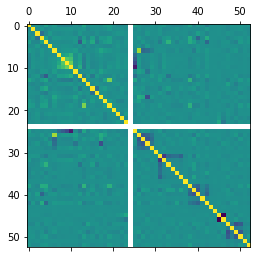

In [38]:
# Correlation graph before PCA feature selection
corr_matrix = df_cleaned.corr()
plt.matshow(corr_matrix)

In [20]:
# Run PCA model for feature selection.
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_cleaned)
pca = PCA(n_components=16)
X_reduced = pca.fit_transform(X_cleaned)

df_reduced = pd.DataFrame(X_reduced)
df_reduced["fraud_bool"] = y.values
pca.explained_variance_ratio_

array([0.06332378, 0.0493498 , 0.04765007, 0.04241528, 0.04066163,
       0.03709006, 0.03423006, 0.0301461 , 0.02800031, 0.02764695,
       0.02422443, 0.02309669, 0.02285048, 0.02161953, 0.02159679,
       0.02081113])

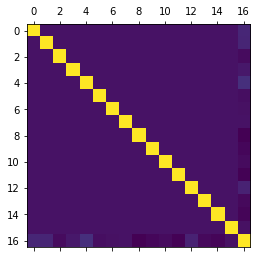

In [37]:
# Correlation graph to display the correlation after PCA
corr_matrix = df_reduced.corr()
plt.matshow(corr_matrix)

In [ ]:
# Save reduced dataframed as PCA.csv
df_reduced.to_csv("Resources/PCA.csv",index=None)

In [ ]:
# Display reduced data.
df_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,fraud_bool
0,0.044850,0.867448,0.265031,1.061007,1.931991,2.603333,0.357424,-1.254235,-1.688642,-0.957369,-2.248566,-0.857269,0.373771,0.926526,1.036380,-1.037806,0
1,2.706031,-1.599373,0.344212,0.675761,-0.763198,-1.087848,1.460787,-0.151737,0.239009,1.254337,0.695271,0.744711,-2.082136,-0.209089,-0.172229,-0.615665,0
2,0.230808,-0.546442,-0.568492,0.770089,-0.102704,-0.761389,1.895435,-0.434829,0.373212,-0.084965,1.431698,0.026007,-1.881884,0.208164,0.469362,1.128934,0
3,1.336715,2.274095,-0.687472,0.805492,1.150722,-0.335813,1.206365,3.425307,-0.470821,0.623067,-1.609263,0.723076,0.179099,0.280377,-1.666089,0.001679,0
4,3.923968,1.584103,0.663011,-0.066138,-0.166105,1.315669,0.052427,0.147390,1.427424,-0.100980,1.551504,-1.043255,-0.443029,0.167595,-0.197517,0.445158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.867461,-0.932826,0.239383,-0.878007,0.801785,3.246743,-2.897401,-1.026451,-0.101146,0.102903,0.816362,-1.122471,-0.644408,0.452687,-0.571728,-0.747138,0
199996,0.917905,3.084591,-1.131610,-0.899251,4.726554,-0.646631,-1.005487,-0.121406,0.683379,-0.063683,0.366227,2.777161,-2.300261,1.475339,-0.261805,0.455674,0
199997,-3.492213,-1.281898,0.869641,0.053085,0.635893,3.012325,0.030276,0.262639,0.147827,-0.409156,1.821083,0.670157,1.128014,0.275166,1.926102,-0.476243,0
199998,0.006483,1.985669,-3.447079,1.658523,-1.254661,-0.943087,-0.045389,-0.934788,-1.048134,-2.633759,-0.387104,-3.315718,1.760104,1.130675,-1.049346,1.120423,0
